#About the Dataset

* Age: Describes the age of individuals. Continuous.
* Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. fnlwgt: Continuous.
* Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* Education-num: Number of years spent in education. Continuous. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: Continuous.
* capital-loss: Continuous.
* hours-per-week: Continuous. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* income: >50K,<=50K

# Loading the data


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# ************** DATA MANIPULATION *****************

import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook')

In [ ]:
# Source: http://archive.ics.uci.edu/dataset/2/adult

features = ["Age","Workclass","Fnlwgt","Education","Education-num","Marital-status","Occupation","Relationship","Race","Sex","Capital-gain","Capital-loss","Hours-per-week","Country","Income"]

# Data Set Link
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=features, sep=r'\s*,\s*', engine='python')

In [ ]:
dataset.head(5)

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Analysis

In [ ]:
# Observations from running dataset.info:

# Age, Final Weight, Education Number, Capital Gain, Capital Loss and Hours Per Week are integer columns.
# There are no Float Datatypes in the dataset.
# Workclass, Education, Marital Status, Occupation, Relationship, Race, Sec, Native Country and Income are of object datatypes.
# There are no null values in the set, however, a closer look tells us that there are a lot of '?' values in our dataset. We will have to replace those values!



# This line of code replaces any occurrences of the string '?' in the DataFrame with NaN values, effectively marking those values as missing data.
dataset.info()

#Calculates the percentage of "?" for each column in the dataset
questionMark_percentage = round((dataset.isin(['?']).sum() / dataset.shape[0]) * 100, 3).astype(str) + ' % |'
questionMark_count = (dataset == '?').sum()
#Displays the amount of rows and collumns
print('\n----  Rows: {} Columns: {}  ----\n'.format(dataset.shape[0], dataset.shape[1]))

print('---------------------------\nRows      "?"s % in column |\n---------------------------')
print(questionMark_percentage)
print('\n---------------------------\nCount:\n')
print(questionMark_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

----  Rows: 32561 Columns: 15  ----

---------------------------
Rows      "?"s % in column 

In [ ]:
#Changing "?" to NaN for better Consistensy, compatibillity, Data Exploration, Machine Learning.
#dataset = dataset.replace('?', np.nan)

#Calculates the percentage of NaN for each column in the dataset
nan_percentage = round((dataset.isnull().sum() / dataset.shape[0]) * 100, 3).astype(str) + ' % |'
#Count of all NaN values.
nan_count = dataset.isna().sum().astype(str)

print('---------------------------\nRows      NaN % in column |\n---------------------------')
print(nan_percentage)
print('\n---------------------------\nCount:\n')
print(nan_count)

if (dataset == '?').sum().sum() == 0:
    everyoneChanged = 'Each "?" became a NaN'
else:
    everyoneChanged = 'The dataset still contains "?".'
print(everyoneChanged)

---------------------------
Rows      NaN % in column |
---------------------------
Age               0.0 % |
Workclass         0.0 % |
Fnlwgt            0.0 % |
Education         0.0 % |
Education-num     0.0 % |
Marital-status    0.0 % |
Occupation        0.0 % |
Relationship      0.0 % |
Race              0.0 % |
Sex               0.0 % |
Capital-gain      0.0 % |
Capital-loss      0.0 % |
Hours-per-week    0.0 % |
Country           0.0 % |
Income            0.0 % |
dtype: object

---------------------------
Count:

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Country           0
Income            0
dtype: object
The dataset still contains "?".


In [ ]:
# Observations from running dataset.describe().T:

# The minimum age in the dataset is 17, with the maximum being 90.
# The average age in the dataset is 37.
# The minimum years spent on education is 1, with the maximum being 16.
# The average years spent on education is 10.
# The capital gain maximum number is 99999, which is a weird number and might be an error in the dataset.

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
Hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
# This line of code replaces missing values in the specified columns ('Workclass', 'Occupation', and 'Country') with the most common value found in each respective column.
# This helps in filling in missing data with reasonable estimates based on the most frequent values in each column.
for col in ['Workclass', 'Occupation', 'Country']:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

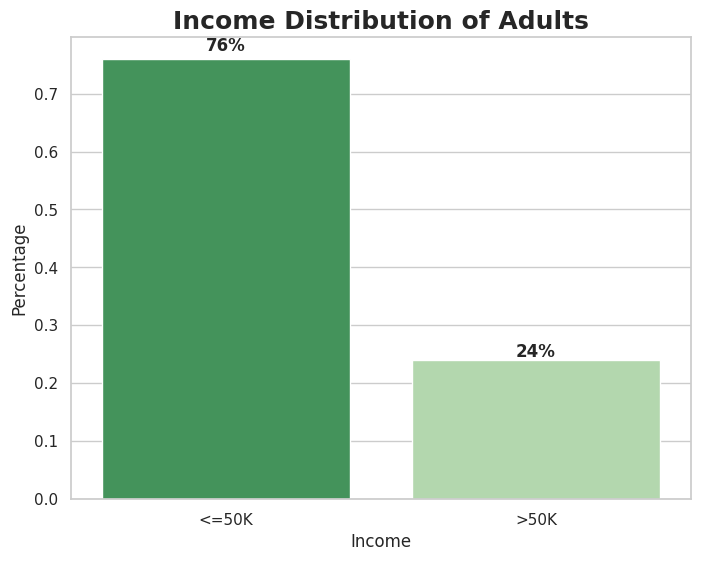

In [ ]:
# Observations from diagram:
# The number of people earning more than 50K a year is one 24%, which is almost 1/4 of the entire dataset.

sns.set_style("whitegrid")
plt.figure(figsize = (8,6))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = dataset['Income'].value_counts(normalize = True).rename_axis('Income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'Income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

In [ ]:
# By separating the dataset into age groups we might be able to get see income patterns.

def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

dataset['age_group'] = dataset['Age'].apply(age_group)

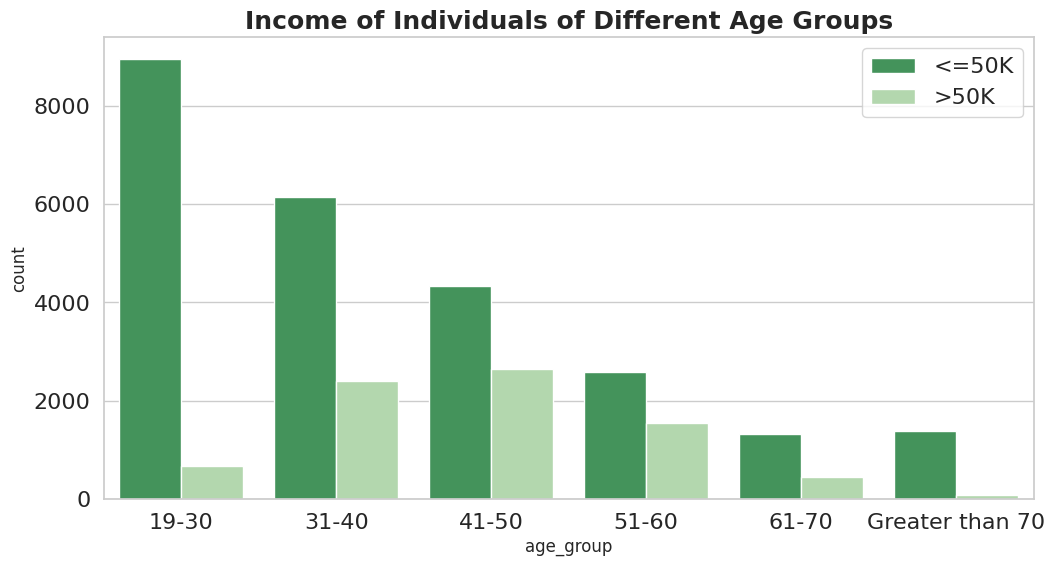

In [ ]:
# The number of people earning more than 50K is quite small amongst people of age group 19-30.
# For the people of age group 41-50 and 51-60, the number of people earning more than 50K is quite comparable to those earning less than it.

plt.figure(figsize=(12, 6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']

sns.countplot(x='age_group', hue='Income', data=dataset, palette='Greens_r', order=order_list)

plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

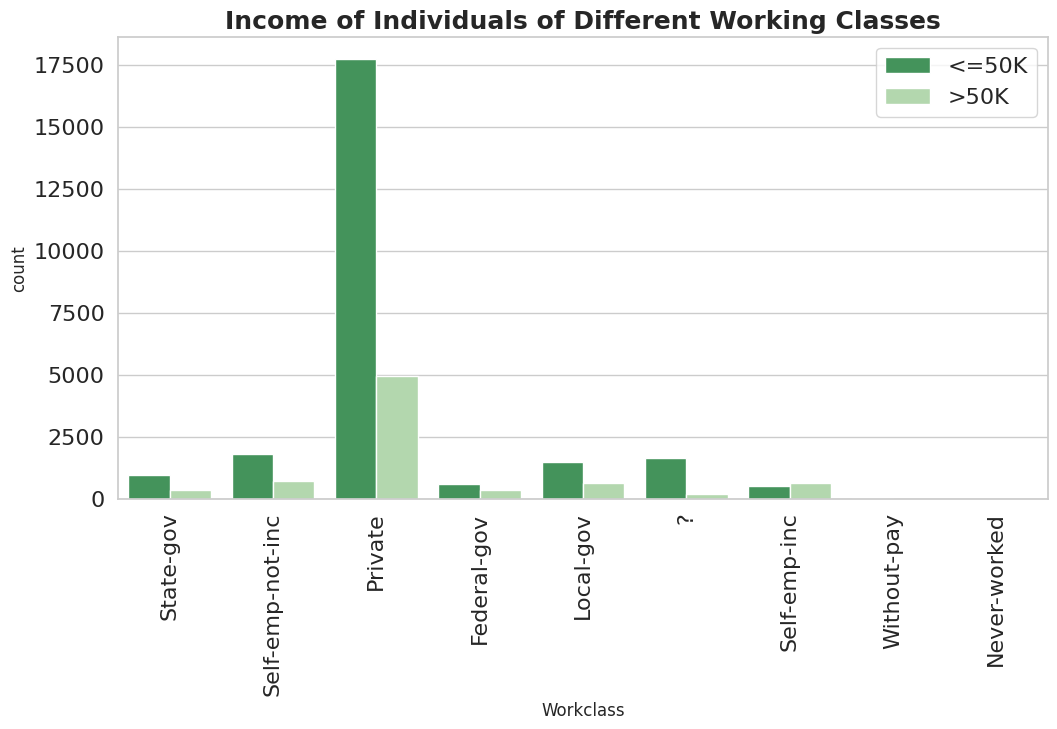

In [ ]:
# In the graph below, we have segregated the incomes of adults on the basis of their different working classes.
# Self-Employed is the only category where the number of people who earn more than 50K dollars exceed those earning less than it

plt.figure(figsize=(12, 6))
sns.countplot(x='Workclass', hue='Income', data=dataset, palette='Greens_r')

plt.title('Income of Individuals of Different Working Classes', fontsize=18, fontweight='bold')

plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

#Data Preprocessing

##Replace ? with mode

In [ ]:
#Here we are replacing the missing values with the most frequent values.
#Replacing ? with NaN.
dataset = dataset.replace('?', np.nan)

#Checking the null values in % for each row.
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

In [ ]:
#Columns containing NaN.
columns_containing_nan = ['Workclass', 'Occupation', 'Country']
#Changing the NaN values to the most frequent.
for col in columns_containing_nan:
  dataset[col].fillna(dataset[col].mode()[0], inplace = True)

round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

##Encode Columns

In [ ]:
#Here we are encoding the object columns for further usage.
from sklearn.preprocessing import LabelEncoder

for col in dataset.columns:
  if dataset[col].dtypes == 'object':
    encoder = LabelEncoder()
    dataset[col] = encoder.fit_transform(dataset[col])

##Split dataset into X(Inputs) and Y(Target)

In [ ]:
#InputFeatures
X = dataset.drop('Income', axis = 1)
#Target Variable
Y = dataset['Income']

##Feature Selection

In [ ]:
#Here We perform Feature Selection to prevent multicollinearity and Overfitting
from sklearn.ensemble import ExtraTreesClassifier
#Finding the importance of the features with ExtraTreesClassifier.
selector = ExtraTreesClassifier(random_state = 42)

selector.fit(X, Y)
importance = selector.feature_importances_
#Making a list with the features and their importance
featureImportance_list = [(X.columns[index], val) for index, val in enumerate(importance)]
#Sorting it in descending order of importance
featureImportance_list_ascending = sorted(featureImportance_list, key=lambda x: x[1], reverse=True)
#Printing the list with importance in percentage
for index, (feature, importance) in enumerate(featureImportance_list_ascending):
  print(f"{index + 1}. Feature: {feature}, Importance: {round(importance * 100, 2)}")

In [ ]:
#Dropping features with importance less then 5%
X = X.drop(['Workclass', 'Education', 'Sex', 'Capital-loss', 'Country', 'Race'], axis = 1)

##Feature Scaling

In [ ]:
#Standarizing the dataset to help the model learn the patterns
from sklearn.preprocessing import StandardScaler
for col in X.columns:
  scaler = StandardScaler()
  X[col] = scaler.fit_transform(X[col].values.reshape(-1,1))

##Oversampling

In [ ]:
#The Feature Target (Y) is imbalanced, there are a significant more people earning less than 50k
value_counts = Y.value_counts(normalize=True) * 100
#assigning new names to the indexes.
value_counts.index = ['Below 50k', 'Above 50k']
#setting to 2 decimals and making it to string
result = value_counts.round(2).astype(str) + ' %'

print(result)

In [ ]:
#Balancing the Feature Target
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
ros.fit(X,Y)
X_resampled, Y_resampled = ros.fit_resample(X,Y)

Y_resampled_df = pd.Series(Y_resampled).value_counts(normalize = True) * 100
Y_resampled_df.index = ['Belov 50k', 'Above 50k']

result = Y_resampled_df.round(2).astype(str) + ' %'
print(result)

##Splitting to training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size = 0.2, random_state = 42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

#Data Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state = 42)
rf_classifier.fit(X_train, Y_train)
Y_pred_rf_classifier = rf_classifier.predict(X_test)

#Model Evaluation

In [ ]:
#Here we evaluate the model using accuracy_score and f1_score.
#Tells the ration of correct predicted values over the total predicted values.
from sklearn.metrics import accuracy_score
#Weighted average of precision and recall
from sklearn.metrics import f1_score

print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_classifier)*100,2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_classifier)*100,2))

Random Forest Classifier:
Accuracy score: 92.36
F1 score: 92.75


#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 40, stop = 150, num = 15)]
max_depth = [int(x) for x in np.linspace(40, 150, num = 15)]
param_dist = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
}

rf_tuned = RandomForestClassifier(random_state = 42)
rf_cv = RandomizedSearchCV(estimator = rf_tuned, param_distributions = param_dist, cv = 5, random_state = 42)
rf_cv.fit(X_train, Y_train)
rf_cv.best_score_

0.9106238221324754

In [ ]:
rf_cv.best_params_

{'n_estimators': 142, 'max_depth': 110}

In [ ]:
rf_best = RandomForestClassifier(max_depth = 110, n_estimators = 142, random_state = 42)
rf_best.fit(X_train, Y_train)
Y_pred_rf_best = rf_best.predict(X_test)

print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best)*100,2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best)*100,2))

Random Forest Classifier:
Accuracy score: 92.29
F1 score: 92.69


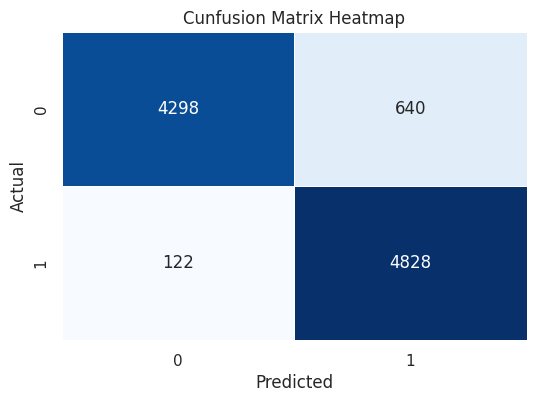

In [ ]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', linewidths=.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Cunfusion Matrix Heatmap')
plt.show()

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      4938
           1       0.88      0.98      0.93      4950

    accuracy                           0.92      9888
   macro avg       0.93      0.92      0.92      9888
weighted avg       0.93      0.92      0.92      9888

